<a href="https://colab.research.google.com/github/vdragon95/lol_project/blob/develop/LOL04_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
import requests
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns


# queue = str(420) # 'RANKED_SOLO_5x5' # 이미 LOL03 파일에서 필터링 거쳤으므로 고려하지 않음
all_tier = ['grandmaster','challenger'] # master, 

In [ ]:
'''☆한번하고 주석 처리할것!☆'''
# # 02match_info_queue_revised_data ('grandmaster','challenger') 병합
# all_match_info = pd.DataFrame()

# for tier in all_tier:
#     match_info_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/' + tier + '/' + \
#                 tier + '_02match_info_queue_revised_data.csv', encoding = 'cp949')
#     all_match_info = pd.concat([all_match_info, match_info_df])

# print('all match integrated data file successfully loaded!')
# all_match_info.to_csv('/content/drive/MyDrive/Colab Notebooks/all/02all_match_info_queue_revised_data.csv',index=False,encoding = 'cp949')
# print('all match integrated data file saved!')


all match integrated data file successfully loaded!
all match integrated data file saved!


In [ ]:
'''☆한번하고 주석 처리할것!☆'''
# 03team_data (0 ~ 20000) ('grandmaster','challenger') 병합
# teams_df = pd.DataFrame()

# units = int(len(all_match_info) / 10000)
# print(units)

# for tier in all_tier:
#     for i in range(units):
#         start_point = i * 10000
#         end_point = (i + 1) * 10000

#         if i == (units - 1):
#             end_point = len(match_info_df)

#         if os.path.exists('/content/drive/MyDrive/Colab Notebooks/' + tier + '/' + \
#                             tier + '_03team_data(' + \
#                         str(start_point) + '-'+ str(end_point) + ').csv'):
#             team_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/' + tier + '/' + \
#                             tier + '_03team_data(' + \
#                         str(start_point) + '-'+ str(end_point) + ').csv', encoding = 'cp949')
#             teams_df = pd.concat([teams_df, team_df])
#             print('/content/drive/MyDrive/Colab Notebooks/' + tier + '/' + \
#                             tier + '_03team_data(' + \
#                         str(start_point) + '-'+ str(end_point) + ').csv is loaded and integrated')

# teams_df = teams_df.dropna(axis=0) # 결측치 제거
# teams_df = teams_df.reset_index(drop=True) # 번호 초기화
# print(teams_df.shape)

# #----------------------------------   

# teams_df.to_csv('/content/drive/MyDrive/Colab Notebooks/all/03all_team_integrated_data.csv',index=False,encoding = 'cp949')
# print('all team integrated data file saved!')

'☆한번하고 주석 처리할것!☆'

In [ ]:
'''☆한번하고 주석 처리할것!☆'''
# 04individual_data (0 ~ 20000) ('grandmaster','challenger') 병합

# indis_df = pd.DataFrame()
# for tier in all_tier:
#     for i in range(units):
#         start_point = i * 10000
#         end_point = (i + 1) * 10000

#         if i == (units - 1):
#             end_point = len(match_info_df)

#         if os.path.exists('/content/drive/MyDrive/Colab Notebooks/' + tier + '/' + \
#                     tier + '_04individual_data(' + \
#                 str(start_point) + '-'+ str(end_point) + ').csv'):
#             indi_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/' + tier + '/' + \
#                     tier + '_04individual_data(' + \
#                 str(start_point) + '-'+ str(end_point) + ').csv', encoding = 'cp949')
#             indis_df = pd.concat([indis_df, indi_df])

# indis_df = indis_df.dropna(axis=0) # 결측치 제거
# indis_df = indis_df.reset_index(drop=True)

# print(indis_df.iloc[:, :5].head())
# print(indis_df.shape)

# indis_df.to_csv('/content/drive/MyDrive/Colab Notebooks/all/04all_individual_integrated_data.csv',index=False,encoding = 'cp949')
# print('all individual integrated data file saved!')
# print('ALL Pre-Processing data is ready. PLEASE COUNTINUE↓')

'☆한번하고 주석 처리할것!☆'

In [ ]:
# 승률 예측에 필요한 features 가져오기
teams_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all/03all_team_integrated_data.csv', encoding = 'cp949')



# <score data> 
## win, firstBlood, firstTower, firstInhibitor, firstBaron, firstDragon,
## firstRiftHerald, towerKills, inhibitorKills, baronKills, dragonKills ⇒ 11개의 중요 features
teams_gameId = list(teams_df['gameId'])
print(len(teams_gameId))
teams_gameId.extend(teams_gameId)
print(len(teams_gameId)) # 나중에 blue red 합칠때 쓰일 것

blue_team = teams_df.iloc[:, 1:12] # teamId: 100 (11개 features + teamId)
red_team = teams_df.iloc[:, 16:27] # teamId: 200

print(teams_df.shape)
print(blue_team)
print(red_team)

39751
79502
(39751, 32)
       teamId   win  firstBlood  ...  towerKills  inhibitorKills  baronKills
0       100.0  Fail       False  ...         7.0             0.0         1.0
1       100.0   Win        True  ...         6.0             1.0         1.0
2       100.0   Win       False  ...         9.0             1.0         0.0
3       100.0  Fail       False  ...         2.0             0.0         0.0
4       100.0  Fail       False  ...         2.0             0.0         1.0
...       ...   ...         ...  ...         ...             ...         ...
39746   100.0   Win        True  ...         7.0             1.0         0.0
39747   100.0  Fail        True  ...         4.0             0.0         1.0
39748   100.0   Win        True  ...         2.0             0.0         0.0
39749   100.0   Win        True  ...         7.0             1.0         0.0
39750   100.0  Fail       False  ...         1.0             0.0         0.0

[39751 rows x 11 columns]
       teamId.1 win.1  ..

In [ ]:
# True / False → Labeling ※ 나머지는 연속형 변수 이므로 그대로 진행
from sklearn.preprocessing import LabelEncoder

for i in range(1,8): # 이러면 1(win) ~ 7(firstRiftHerald) 까지 주의
    le = LabelEncoder()
    temp = list(blue_team.iloc[:,i])
    le.fit(temp) # sort order로 indexing되므로 False: 0, True: 1
    temp = le.transform(temp) 
    
    blue_team.iloc[:,i] = temp

for i in range(1,8):
    le = LabelEncoder()
    temp = list(red_team.iloc[:,i])
    
    le.fit(temp) # sort order로 indexing되므로 False: 0, True: 1
    temp = le.transform(temp) 
    
    red_team.iloc[:,i] = temp


new_cols = {x: y for x, y in zip(red_team.columns, blue_team.columns)}
red_team = red_team.rename(columns=new_cols) # 중복된 칼럼 이름이 자동변경 되어 concat을 위해 다시 원상태로 변경

teams_df = pd.concat([blue_team, red_team], ignore_index=True)
win_lose = {"Win" : 1, "Fail": 0}
teams_df['win'].map(win_lose).tolist()
teams_df['gameId'] = teams_gameId

teams_df_col = list(teams_df.columns)
teams_df_col.remove('gameId')
teams_df_col.insert(0, 'gameId')

teams_df = teams_df[teams_df_col]
print(teams_df)
teams_df = teams_df.drop_duplicates()

teams_df.to_csv('/content/drive/MyDrive/Colab Notebooks/all/03team_data_merged.csv',index=False,encoding = 'cp949')
print('team merged data file saved!')

             gameId  teamId  win  firstBlood  firstTower  firstInhibitor  \
0      4.766619e+09   100.0    0           0           1               0   
1      4.766647e+09   100.0    1           1           1               1   
2      4.766597e+09   100.0    1           0           1               1   
3      4.764302e+09   100.0    0           0           0               0   
4      4.764207e+09   100.0    0           0           0               0   
...             ...     ...  ...         ...         ...             ...   
79497  4.834186e+09   200.0    0           0           1               0   
79498  4.834182e+09   200.0    1           0           0               1   
79499  4.834137e+09   200.0    0           0           1               0   
79500  4.833248e+09   200.0    0           0           0               0   
79501  4.833167e+09   200.0    1           1           1               0   

       firstBaron  firstDragon  firstRiftHerald  towerKills  inhibitorKills  \
0       

In [ ]:
teams_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all/03team_data_merged.csv', encoding = 'cp949')

from sklearn.model_selection import train_test_split
train, test = train_test_split(teams_df.iloc[:, 1:], test_size=0.3)
# print(train)
# print(test)
x_train = train.iloc[:, 2:]
y_train = train.iloc[:, 1]
x_test = train.iloc[:, 2:]
y_test = train.iloc[:, 1]

x_train_columns = x_train.columns

accuracies_team = []

# 표준화
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train, x_test)    # x값만 대상
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)  

Out-of-bag score estimate: 0.86
Mean accuracy score: 0.866
[{'RandomForest': 0.866}]


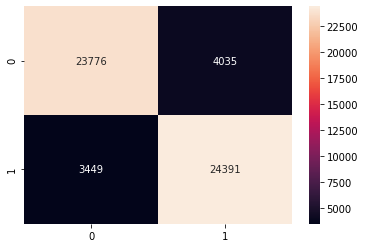

In [ ]:
# [RandomForest]
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(x_train, y_train) #소환사 코드를 float로 바꿔줘야함

from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

accuracies_team.append({'RandomForest': round(accuracy, 3)})
print(accuracies_team)

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=[0, 1], index=[0, 1])
sns.heatmap(cm, annot=True, fmt='2g')
plt.show()

(-1.0, 9.0)

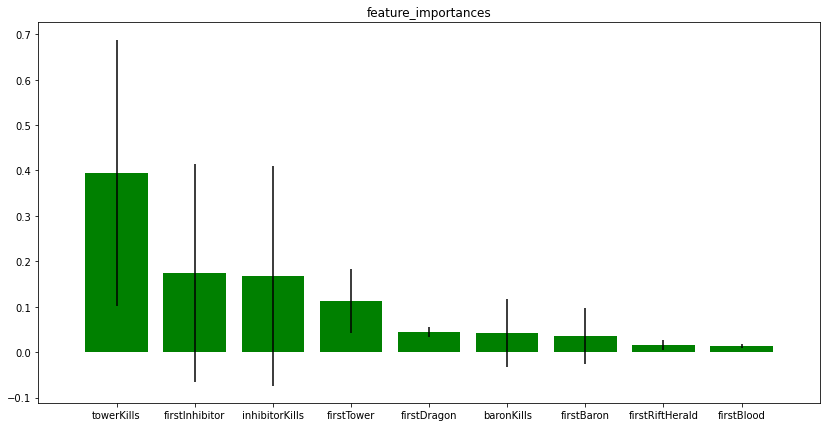

In [ ]:
# 변수 중요도 표시 ---------------------------------------------------
varDic = {'var':x_train_columns,'imp': rf.feature_importances_}
imp = pd.DataFrame(varDic)
imp = imp.sort_values(by='imp', ascending=False)[0:17]
# plt.show()

# plot2
fig = plt.figure(figsize=(14,7))

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1] # 내림차순 정렬 (::1 두칸 간격으로?)

plt.title("feature_importances")
plt.bar(range(x_train.shape[1]), importances[indices],
        color="g", yerr=std[indices], align="center")

x_train = pd.DataFrame(x_train)
plt.xticks(np.arange(x_train.shape[1]), tuple(imp["var"]))

plt.xlim([-1, x_train.shape[1]])


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


barplot.png saved!


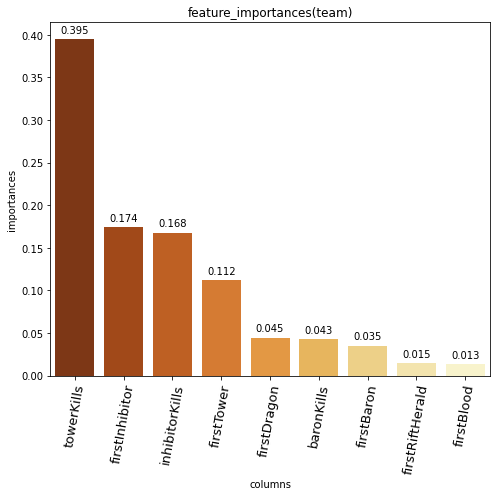

RandomForest - feature_importances(barplot)


<Figure size 432x288 with 0 Axes>

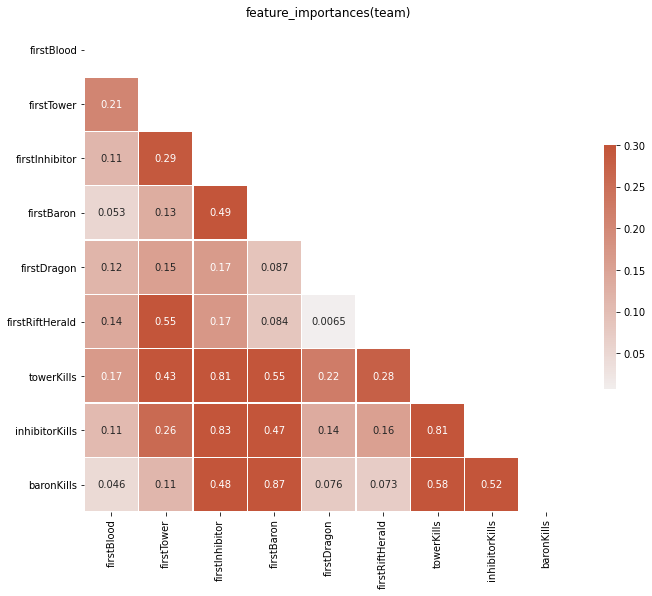

heatmap.png saved!
RandomForest - correlationship(heatmap)


In [ ]:
# plot2
df_fi = pd.DataFrame({'columns':x_train_columns, 'importances': rf.feature_importances_})
# df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)


fig = plt.figure(figsize=(7,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'], palette="YlOrBr_r") # _r 붙이면 reversed
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.title('feature_importances(team)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/all/feature_importances(team)_barplot.png')
print('barplot.png saved!')
plt.show()
print('RandomForest - feature_importances(barplot)')

plt.clf() # 그림 초기화

## 변수 상관 관계 표시 (heatmap)
corr = x_train.corr()
# print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2g')
plt.title('feature_importances(team)')
plt.show()
ax.figure.savefig('/content/drive/MyDrive/Colab Notebooks/all/feature_importances(team)_heatmap.png')
print('heatmap.png saved!')
print('RandomForest - correlationship(heatmap)')

In [ ]:
# [XGBoost]
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# 스케일링
sc = StandardScaler()
sc.fit(x_train, x_test)    # x값만 대상
x_train2 = sc.transform(x_train)  
x_test2 = sc.transform(x_test)  

model = xgb.XGBClassifier(booster='gbtree', max_depth=4, n_estimators=1000)
model.fit(x_train2,y_train)
print()  
y_pred = model.predict(x_test2)  # 예측
# print('실제값 :', y_pred[:5])
# print('예측값:', np.array(y_test[:5]))
print('정확도 :', metrics.accuracy_score(y_test, y_pred))
accuracies_team.append({'XGBoost': round(metrics.accuracy_score(y_test, y_pred), 3)})
print(accuracies_team)


정확도 : 0.8605775278072272
[{'RandomForest': 0.866}, {'XGBoost': 0.861}]


In [ ]:
# [tensorflow - deep learning]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # 학습시 조기 중단 및 체크 포인트 
import tensorflow as tf

x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')
print(x_train.shape)

# 모델 설계
model = Sequential()
model.add(Dense(64, input_dim=len(x_train.columns), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Batch 정규화 - Gradient loss: 등의 문제 해결
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
loss, acc = model.evaluate(x_test, y_test, batch_size=128, verbose=2)

history = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=2)
acc = history.history['acc']
# print('정확도 :', acc)
accuracies_team.append({'Sequential': round(acc[-1], 3)})
print(accuracies_team)

# 예측 
pred = (model.predict(x_test) > 0.5).astype('int32')
print('예측값:', pred.flatten())
print('실제값:', list(y_test))
print('총 개수: %d, 오류수: %d'%(len(y_test),(y_test != pred.flatten()).sum()))
print(round((y_test == pred.flatten()).sum() / len(y_test) * 100, 2), '%%')

(55651, 9)
435/435 - 1s - loss: 0.6925 - acc: 0.5399
Epoch 1/40
435/435 - 2s - loss: 0.3440 - acc: 0.8504
Epoch 2/40
435/435 - 1s - loss: 0.3263 - acc: 0.8556
Epoch 3/40
435/435 - 1s - loss: 0.3243 - acc: 0.8550
Epoch 4/40
435/435 - 1s - loss: 0.3239 - acc: 0.8559
Epoch 5/40
435/435 - 1s - loss: 0.3216 - acc: 0.8564
Epoch 6/40
435/435 - 1s - loss: 0.3215 - acc: 0.8563
Epoch 7/40
435/435 - 1s - loss: 0.3208 - acc: 0.8566
Epoch 8/40
435/435 - 1s - loss: 0.3206 - acc: 0.8577
Epoch 9/40
435/435 - 1s - loss: 0.3201 - acc: 0.8569
Epoch 10/40
435/435 - 1s - loss: 0.3197 - acc: 0.8579
Epoch 11/40
435/435 - 1s - loss: 0.3185 - acc: 0.8576
Epoch 12/40
435/435 - 1s - loss: 0.3186 - acc: 0.8575
Epoch 13/40
435/435 - 1s - loss: 0.3182 - acc: 0.8577
Epoch 14/40
435/435 - 1s - loss: 0.3182 - acc: 0.8583
Epoch 15/40
435/435 - 1s - loss: 0.3179 - acc: 0.8592
Epoch 16/40
435/435 - 1s - loss: 0.3177 - acc: 0.8586
Epoch 17/40
435/435 - 1s - loss: 0.3170 - acc: 0.8575
Epoch 18/40
435/435 - 1s - loss: 0.316

In [ ]:
# [데이터 전처리] - 04all_individual_integrated_data
indis_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all/04all_individual_integrated_data.csv', encoding = 'cp949')



val = ['matchId', 'participantId', 'teamId', 'championId', 'win', 'kills', 'deaths', 'assists', 'totalDamageDealt', 'damageDealtToObjectives', 'totalDamageDealtToChampions', 'damageDealtToTurrets', 'inhibitorKills', 'firstTowerKill', 'turretKills', 'goldEarned', 'goldSpent', 'champLevel', 'totalMinionsKilled', 'firstBloodKill', 'firstInhibitorKill', 'neutralMinionsKilledTeamJungle', 'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilled', 'visionScore', 'wardsPlaced', 'wardsKilled']
# 공백 제거 후 list return 하는 split()사용. feat. import re
indis_df = indis_df[val]

# True / False → Labeling ※ 나머지는 연속형 변수 이므로 그대로 진행
## ['firstBloodKill', 'firstInhibitorKill', 'firstTowerKill', 'win']

from sklearn.preprocessing import LabelEncoder
for i in ['firstBloodKill', 'firstInhibitorKill', 'firstTowerKill']:
    # print(list(indis_df[i]))
    indis_df[i] = indis_df[i].astype(int) # T_F = {"False" : 0, "True": 1} 또는 {"FALSE" : 0, "TRUE": 1} 이거 적용 안됨
    # print(list(indis_df[i]))

pd.set_option('display.max_columns', 500) # 펼쳐 보기 
# print(indis_df)

le = LabelEncoder()
temp = list(indis_df['win'])
le.fit(temp) # sort order로 indexing되므로 False: 0, True: 1
temp = le.transform(temp) 

indis_df['win'] = temp

# print(dict(zip(indis_df.columns, range(len(indis_df.columns))))['win'])

# 칼럼 순서 변경 (win 먼저오도록)
cols = indis_df.columns.tolist()

# tmp = cols[4] #11번째 column을
# del cols[4]
# cols.insert(1,tmp) #2번째 위치로
# indis_df = indis_df[cols]

# KDA 칼럼 추가
kill = list(indis_df['kills'])
death = list(indis_df['deaths'])
assist = list(indis_df['assists'])
kda = []

for i in range(len(kill)):
    if death[i] == 0:
        kda.append((kill[i] + assist[i]) * 1.2)
    else:
        kda.append((kill[i] + assist[i]) / death[i])

indis_df['kda'] = kda

print(indis_df.iloc[:, :10].head())
print()
print('PLEASE COUNTINUE↓ with', indis_df.shape)

indis_df = indis_df.drop_duplicates()

indis_df.to_csv('/content/drive/MyDrive/Colab Notebooks/all/04indi_data_merged.csv',index=False,encoding = 'cp949')
print('individual merged data file saved!')

        matchId  participantId  teamId  championId  win  kills  deaths  \
0  4.766619e+09              1     100         203    0      6       6   
1  4.766619e+09              2     100         114    0      5       8   
2  4.766619e+09              3     100          57    0      1       6   
3  4.766619e+09              4     100          68    0     10       5   
4  4.766619e+09              5     100         202    0      6       7   

   assists  totalDamageDealt  damageDealtToObjectives  
0        9            200616                    35054  
1        6            183805                     9668  
2       13             33860                     3862  
3        8            147936                     9827  
4       10            210171                     7340  

PLEASE COUNTINUE↓ with (183779, 28)
individual merged data file saved!


In [ ]:
indis_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/all/04indi_data_merged.csv', encoding = 'cp949')
print(indis_df.shape)

(183779, 28)


In [ ]:
# [ingame 정보를 이용한 승패 분류 학습 모델 구축] - 같은 팀임을 고려 안한 모델

from sklearn.model_selection import train_test_split
train, test = train_test_split(indis_df.iloc[:, 4:].drop(['kills', 'deaths','assists'], axis=1), test_size=0.3)

x_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
x_test = train.iloc[:, 1:]
y_test = train.iloc[:, 0]

print(train.columns)
print(x_train.shape)
print(x_train)
print(y_train.shape)

accuracies_indi = []

Index(['win', 'totalDamageDealt', 'damageDealtToObjectives',
       'totalDamageDealtToChampions', 'damageDealtToTurrets', 'inhibitorKills',
       'firstTowerKill', 'turretKills', 'goldEarned', 'goldSpent',
       'champLevel', 'totalMinionsKilled', 'firstBloodKill',
       'firstInhibitorKill', 'neutralMinionsKilledTeamJungle',
       'neutralMinionsKilledEnemyJungle', 'neutralMinionsKilled',
       'visionScore', 'wardsPlaced', 'wardsKilled', 'kda'],
      dtype='object')
(128645, 20)
        totalDamageDealt  damageDealtToObjectives  ...  wardsKilled       kda
123646            158673                    16110  ...            6  2.750000
31027             239433                    45764  ...            5  6.750000
3485              164756                     5948  ...            4  1.300000
178097            105963                    13059  ...            8  3.000000
23352             205512                     7389  ...            7  2.833333
...                  ...               

In [ ]:
# [Logistic Regression] for indi
import statsmodels.formula.api as smf

column_select = "+".join(train.columns.difference(['win'])) # win 칼럼 빼고 모든 칼럼 a + b + ... 형태
formula = 'win ~ ' + column_select

model = smf.logit(formula=formula, data = train).fit() # logistic regression은 formula로써 x, y값을 구분함

pred = model.predict(test)
print('예측값:', np.around(pred.values))
print('실제값:', y_test.values)
# print('총 개수: %d, 오류수: %d'%(len(y_test.values),(y_test.values != np.around(pred.values)).sum()))

conf_tab = model.pred_table()
print('confusion matrix[혼돈행렬]:\n', conf_tab)
print('분류 정확도:', (conf_tab[0][0] + conf_tab[1][1]) / len(y_test))
accuracies_indi.append({'Logistic': round((conf_tab[0][0] + conf_tab[1][1]) / len(y_test), 3)})
print(accuracies_indi)
# 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vifDf = pd.DataFrame()
vifDf['features'] = x_train.columns
vifDf['vif_factor'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
print(vifDf) 
print(list(vifDf[vifDf['vif_factor'] <= 10]['features'])) 

print('다중 공선성이 강한 변수 배제 후 ↓')
# 다중 공선성이 강한 변수 배제 후 Linear Regression
## 일반적으로 VIF 즉, 분산팽창계수가 10 이상 일때 다중공선성이 존재한다고 판단한다.
col_delete = list(vifDf[vifDf['vif_factor'] <= 100]['features'])
col_delete.append('win')
column_select = "+".join(train.columns.difference(col_delete)) # win 칼럼 빼고 모든 칼럼 a + b + ... 형태
formula = 'win ~ ' + column_select

model = smf.logit(formula=formula, data = train).fit() # logistic regression은 formula로써 x, y값을 구분함

pred = model.predict(test)
print('예측값:', np.around(pred.values))
print('실제값:', y_test.values)
# print('총 개수: %d, 오류수: %d'%(len(y_test.values),(y_test.values != np.around(pred.values)).sum()))

conf_tab = model.pred_table()
print('confusion matrix[혼돈행렬]:\n', conf_tab)
print('분류 정확도:', (conf_tab[0][0] + conf_tab[1][1]) / len(y_test))
# 다중 공선성 확인
col_delete.remove('win')
x_train_vif = x_train[col_delete]
vifDf2 = pd.DataFrame()
vifDf2['features'] = x_train_vif.columns
vifDf2['vif_factor'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
print(vifDf2) 

'''
분석 결과인 회귀 계수가 불안정해지는 것이다. 회귀계수가 해당 변수의 종속변수에 미치는 영향력을
올바로 설명하지 못하게 된다. 즉, 다중공선성을 고려하지 않고 회귀분석을 수행한 후 그 결과를 해석하면
잘못된 결론(변수의 중요성을 설명할 때)을 내리게 되는 문제가발생한다.
'''

Optimization terminated successfully.
         Current function value: 0.306124
         Iterations 8
예측값: [1. 1. 1. ... 0. 0. 1.]
실제값: [1 1 0 ... 1 1 1]
confusion matrix[혼돈행렬]:
 [[57678.  6505.]
 [ 9394. 55068.]]
분류 정확도: 0.8764118310078122
[{'Logistic': 0.876}]
                           features  vif_factor
0                  totalDamageDealt   73.479868
1           damageDealtToObjectives   11.723598
2       totalDamageDealtToChampions   19.055865
3              damageDealtToTurrets    7.142805
4                    inhibitorKills    2.476535
5                    firstTowerKill    1.295439
6                       turretKills    5.232462
7                        goldEarned  286.666608
8                         goldSpent  130.658439
9                        champLevel   71.758622
10               totalMinionsKilled   46.990857
11                   firstBloodKill    1.147970
12               firstInhibitorKill    2.115678
13   neutralMinionsKilledTeamJungle  131.105913
14  neutralMinion

'\n분석 결과인 회귀 계수가 불안정해지는 것이다. 회귀계수가 해당 변수의 종속변수에 미치는 영향력을\n올바로 설명하지 못하게 된다. 즉, 다중공선성을 고려하지 않고 회귀분석을 수행한 후 그 결과를 해석하면\n잘못된 결론(변수의 중요성을 설명할 때)을 내리게 되는 문제가발생한다.\n'

예측값: [1 1 0 ... 1 1 1]
실제값: [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

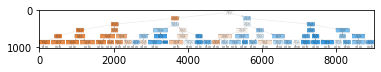

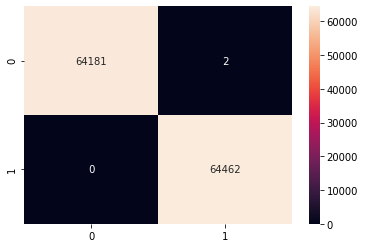

In [ ]:
# [RandomForest] for indi

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,  criterion='entropy', oob_score=True)
rf.fit(x_train.astype('float64'), y_train) #소환사 코드를 float로 바꿔줘야함

from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print('예측값:', predicted.flatten())
print('실제값:', list(y_test))
print('총 개수: %d, 오류수: %d'%(len(y_test),(y_test != predicted.flatten()).sum()))
print(round((y_test == predicted.flatten()).sum() / len(y_test) * 100, 2), '%%')

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')
accuracies_indi.append({'RandomForest': round(accuracy, 3)})
print(accuracies_indi)

# 시각화 ------------------------
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus

dot_data = StringIO() # 파일 흉내를 내는 역할

estimator = rf.estimators_[3]
export_graphviz(estimator, out_file=dot_data, 
                feature_names = list(x_train.columns),
                class_names = ['lose', 'win'],
                max_depth = 5, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/content/drive/MyDrive/Colab Notebooks/all/indi_decision_tree.png')

# 이미지 읽기
from matplotlib.pyplot import imread

img = imread('/content/drive/MyDrive/Colab Notebooks/all/indi_decision_tree.png')
plt.imshow(img)
plt.show()

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=[0, 1], index=[0, 1])
sns.heatmap(cm, annot=True, fmt='2g')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


barplot.png saved!


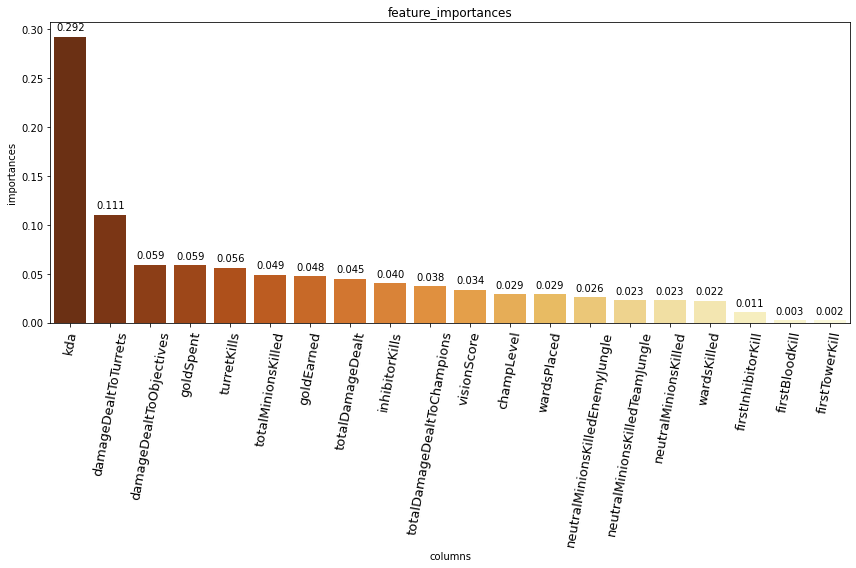

RandomForest - feature_importances(barplot)


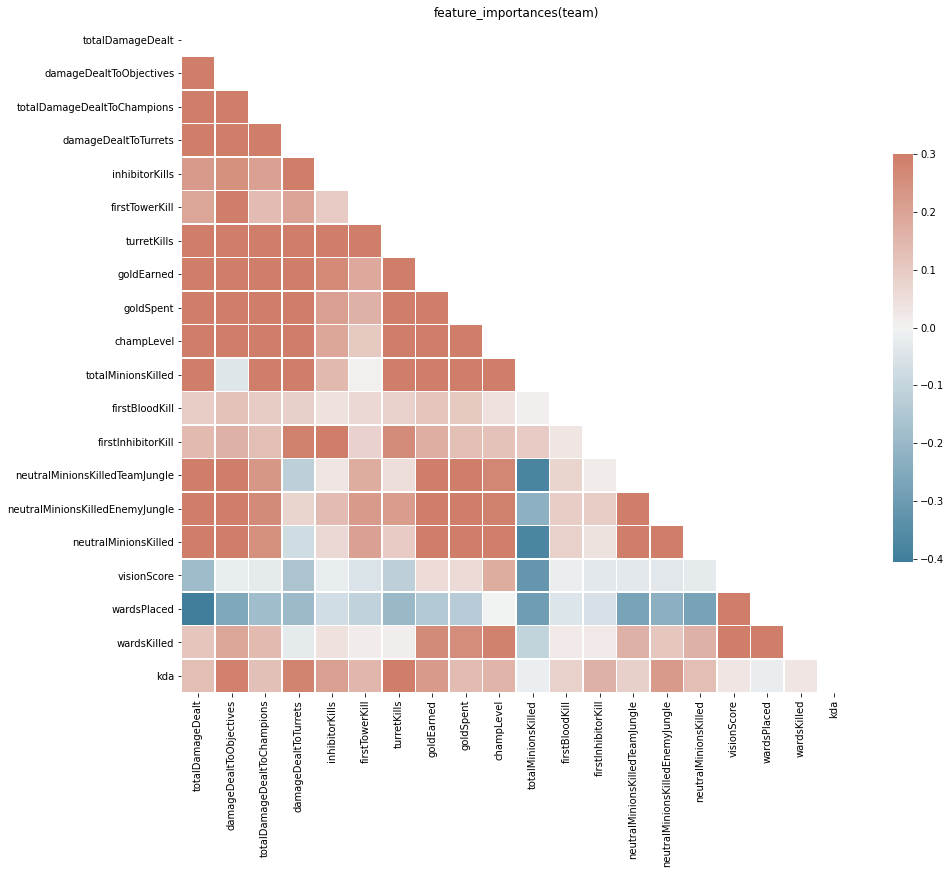

heatmap.png saved!
RandomForest - correlationship(heatmap)


'\nfeature importance 값이 낮다고 유용하지 않다는 것이 아니라 선택되지 않았을 뿐이며 다른 특성이 동일한 정보 지니고 있어서 일 수도 있다.\n'

In [ ]:
# 변수 중요도 표시 for indi---------------------------------------------------

df_fi = pd.DataFrame({'columns':x_train.columns, 'importances': rf.feature_importances_})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False, ignore_index=True)

fig = plt.figure(figsize=(12,8))
ax = sns.barplot(df_fi['columns'], df_fi['importances'], palette="YlOrBr_r") # _r 붙이면 reversed
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)

# for i, v in enumerate(df_fi['columns']):
#     plt.text(v, df_fi['importances'][i], df_fi['importances'],  # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
#              fontsize = 9, 
#              color='blue',
#              horizontalalignment='center',  # horizontalalignment (left, center, right)
#              verticalalignment='bottom')    # verticalalignment (top, center, bottom)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
plt.title('feature_importances')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/all/feature_importances(indi)_barplot.png')
print('barplot.png saved!')
plt.show()
print('RandomForest - feature_importances(barplot)')

# 변수 상관관계 표시 ---------------------------------------------------
# sns.set_theme(style="white")

# Compute the correlation matrix
corr = x_train.corr()
# print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False, fmt='.2g')
plt.title('feature_importances(team)')
plt.show()
ax.figure.savefig('/content/drive/MyDrive/Colab Notebooks/all/feature_importances(indi)_heatmap.png')
print('heatmap.png saved!')
print('RandomForest - correlationship(heatmap)')

'''
feature importance 값이 낮다고 유용하지 않다는 것이 아니라 선택되지 않았을 뿐이며 다른 특성이 동일한 정보 지니고 있어서 일 수도 있다.
'''

In [ ]:
# [tensorflow - deep learning] for indi

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping # 학습시 조기 중단 및 체크 포인트 
import tensorflow as tf

x_train = x_train.astype('float64')
y_train = y_train.astype('float64')
x_test = x_test.astype('float64')
y_test = y_test.astype('float64')
print(x_train.shape)

# 모델 설계
model = Sequential()
model.add(Dense(64, input_dim=len(x_train.columns), activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) # Batch 정규화 - Gradient loss: 등의 문제 해결
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
loss, acc = model.evaluate(x_test, y_test, batch_size=128, verbose=2)

history = model.fit(x_train, y_train, batch_size=128, epochs=40, verbose=2)
acc = history.history['acc']
# print('정확도 :', acc)
accuracies_indi.append({'Sequential': round(acc[-1], 3)})
print(accuracies_indi)

# 예측 
pred = (model.predict(x_test) > 0.5).astype('int32')
print('예측값:', pred.flatten())
print('실제값:', list(y_test))
print('총 개수: %d, 오류수: %d'%(len(y_test),(y_test != pred.flatten()).sum()))
print(round((y_test == pred.flatten()).sum() / len(y_test) * 100, 2), '%%')